In [74]:
import os
import numpy as np
from skimage.io import imread,imshow
from skimage import measure,color,io,feature
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
import keras.utils
from keras.datasets import mnist
from keras import backend as K
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
% matplotlib inline

In [75]:
x=[]
y=[]
path='C:/Users/BEAMCONAN/project_finger/Dataset'
for fname in os.listdir(path):
    print(fname,end=' ')
    paths=path+'/'+str(fname)
    for iname in os.listdir(paths):
        #print(iname,end=' ')
        pathss=paths+'/'+str(iname)
        img_gray=color.rgb2gray(imread(pathss))
        x.append(img_gray)
        y.append(fname)
x=np.array(x)
y=np.array(y)
print(x.shape)

0 1 2 3 4 5 6 7 8 9 (190, 100, 100)


In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30, random_state=507)
print(x_test.shape)

(57, 100, 100)


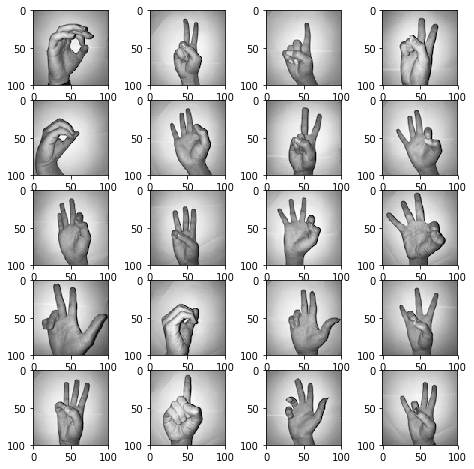

In [77]:
index = np.random.choice(x_train.shape[0], 21, replace=False)
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns * rows + 1):
    img = x_train[index[i]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [78]:
num_classes = 10

x_train = x_train.reshape(133, 100, 100, 1)
x_test = x_test.reshape(57, 100, 100, 1)

# x_train /= 255  # normalize dataset
# x_test /= 255

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

133 train samples
57 test samples


In [79]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(100, 100, 1))) #padding='same'ทำzero padding มาให้
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 100, 100, 64)      640       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 25, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 256)       295168    
__________

In [81]:

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [82]:
model.fit(x_train, y_train,
          batch_size=20,
          epochs=100,
          validation_split=0.2)

Train on 106 samples, validate on 27 samples
Epoch 1/100
106/106 [==============================] - 6s 55ms/step - loss: 2.2981 - acc: 0.0849 - val_loss: 2.2907 - val_acc: 0.0741
Epoch 2/100
106/106 [==============================] - 5s 47ms/step - loss: 2.2877 - acc: 0.1415 - val_loss: 2.2881 - val_acc: 0.0741
Epoch 3/100
106/106 [==============================] - 5s 47ms/step - loss: 2.2795 - acc: 0.1509 - val_loss: 2.2827 - val_acc: 0.0741
Epoch 4/100
106/106 [==============================] - 5s 47ms/step - loss: 2.2713 - acc: 0.1509 - val_loss: 2.2764 - val_acc: 0.0741
Epoch 5/100
106/106 [==============================] - 5s 48ms/step - loss: 2.2625 - acc: 0.1509 - val_loss: 2.2687 - val_acc: 0.0741
Epoch 6/100
106/106 [==============================] - 5s 46ms/step - loss: 2.2548 - acc: 0.1509 - val_loss: 2.2618 - val_acc: 0.0741
Epoch 7/100
106/106 [==============================] - 5s 47ms/step - loss: 2.2445 - acc: 0.1509 - val_loss: 2.2556 - val_acc: 0.2222
Epoch 8/100
106/1

106/106 [==============================] - 6s 58ms/step - loss: 2.1573 - acc: 0.1698 - val_loss: 2.2363 - val_acc: 0.0741
Epoch 62/100
106/106 [==============================] - 5s 48ms/step - loss: 2.1568 - acc: 0.1792 - val_loss: 2.2647 - val_acc: 0.0741
Epoch 63/100
106/106 [==============================] - 5s 48ms/step - loss: 2.1657 - acc: 0.1981 - val_loss: 2.2642 - val_acc: 0.0741
Epoch 64/100
106/106 [==============================] - 5s 50ms/step - loss: 2.1579 - acc: 0.2170 - val_loss: 2.2251 - val_acc: 0.1852
Epoch 65/100
106/106 [==============================] - 5s 47ms/step - loss: 2.1574 - acc: 0.2925 - val_loss: 2.2344 - val_acc: 0.1852
Epoch 66/100
106/106 [==============================] - 5s 51ms/step - loss: 2.1550 - acc: 0.2453 - val_loss: 2.2442 - val_acc: 0.0741
Epoch 67/100
106/106 [==============================] - 7s 63ms/step - loss: 2.1552 - acc: 0.1887 - val_loss: 2.2466 - val_acc: 0.0741
Epoch 68/100
106/106 [==============================] - 5s 49ms/step